# Analysing lyrics through the decades

### First import the data that has already been scraped, looked up and tidied

In [41]:
import pickle, re, pandas as pd
with open('final_lyrics_dump.pickle', 'rb') as lyrics_file:
    lyrics_array = pickle.load(lyrics_file)

df = pd.DataFrame.from_records(lyrics_array)
#getting rid of the descriptions of verses and choruses in the lyrics
df["Lyrics"] = df.apply(lambda x: re.sub(r'\[[^\]]*\]', '', x["Lyrics"]), axis=1)
#getting rid of the newlines in the lyrics
df["Just_Lyrics"] = df.apply(lambda x: re.sub(r'\n', ' ', x["Lyrics"]), axis=1)
#getting rid of the punctuation in the lyrics
df["Just_Lyrics"] = df.apply(lambda x: re.sub(r'[^\w\s]', '', x["Just_Lyrics"]), axis=1)
#making the lyrics lowercase in a new column (in case I need case later)
df["Just_Lower_Lyrics"] = df.apply(lambda x: x["Just_Lyrics"].lower(), axis=1)
df["Lyrics_List"] = df.apply(lambda x: x["Just_Lower_Lyrics"].split(), axis=1)
df.head(10)

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that..."
1,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo..."
2,It's All in the Game,Tommy Edwards,1958,Many a tear have to fall\nBut it's all in the ...,Many a tear have to fall But its all in the ga...,many a tear have to fall but its all in the ga...,"[many, a, tear, have, to, fall, but, its, all,..."
3,It's Only Make Believe,Conway Twitty,1958,People see us everywhere\nThey think you reall...,People see us everywhere They think you really...,people see us everywhere they think you really...,"[people, see, us, everywhere, they, think, you..."
4,Tom Dooley,The Kingston Trio,1958,"\nThroughout history, there have been many son...",Throughout history there have been many songs...,throughout history there have been many songs...,"[throughout, history, there, have, been, many,..."
5,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love..."
6,Smoke Gets in Your Eyes,The Platters,1959,\nThey asked me how I knew\nMy true love was t...,They asked me how I knew My true love was tru...,they asked me how i knew my true love was tru...,"[they, asked, me, how, i, knew, my, true, love..."
7,Stagger Lee,Lloyd Price,1959,The night was clear and the moon was yellow\nA...,The night was clear and the moon was yellow An...,the night was clear and the moon was yellow an...,"[the, night, was, clear, and, the, moon, was, ..."
8,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ..."
9,Come Softly to Me,The Fleetwoods,1959,"\nDoo dooby doo\nDum dum, dum doo dum, dooby d...",Doo dooby doo Dum dum dum doo dum dooby doo D...,doo dooby doo dum dum dum doo dum dooby doo d...,"[doo, dooby, doo, dum, dum, dum, doo, dum, doo..."


### Make the counts of words


In [42]:
def word_count(row):
    # Count the Number of Occurrences in a Python list using Counter
    lyrics_list = row["Lyrics_List"]
    from collections import Counter
    lyric_count_dict = Counter(lyrics_list)
    return lyric_count_dict

df["Lyrics_Count"] = df.apply(word_count, axis=1)
df.sample(10)

,Song title,Artist,Year,Lyrics,Just_Lyrics,Just_Lower_Lyrics,Lyrics_List,Lyrics_Count
820,Diamonds,Rihanna,2012,\nShine bright like a diamond\nShine bright li...,Shine bright like a diamond Shine bright like...,shine bright like a diamond shine bright like...,"[shine, bright, like, a, diamond, shine, brigh...","{'shine': 23, 'bright': 27, 'like': 38, 'a': 2..."
996,Right Round,Flo Rida,2009,"\nYou spin my head right round, right round\nW...",You spin my head right round right round When...,you spin my head right round right round when...,"[you, spin, my, head, right, round, right, rou...","{'you': 34, 'spin': 10, 'my': 29, 'head': 10, ..."
242,Go Away Little Girl,Donny Osmond,1971,"Go away, little girl\nGo away, little girl\nI'...",Go away little girl Go away little girl Im not...,go away little girl go away little girl im not...,"[go, away, little, girl, go, away, little, gir...","{'go': 9, 'away': 9, 'little': 10, 'girl': 10,..."
890,Be With You,Enrique Iglesias,2000,\nMonday night and I feel so low\nI count the ...,Monday night and I feel so low I count the ho...,monday night and i feel so low i count the ho...,"[monday, night, and, i, feel, so, low, i, coun...","{'monday': 1, 'night': 2, 'and': 10, 'i': 21, ..."
266,I Am Woman,Helen Reddy,1972,"\nI am woman, hear me roar\nIn numbers too big...",I am woman hear me roar In numbers too big to...,i am woman hear me roar in numbers too big to...,"[i, am, woman, hear, me, roar, in, numbers, to...","{'i': 34, 'am': 21, 'woman': 8, 'hear': 1, 'me..."
1065,Drop It Like It's Hot,Snoop Dogg featuring Pharrell,2004,\n\n\nSnoop\nSnoop\n\n\nWhen the pimp's in the...,Snoop Snoop When the pimps in the crib ma...,snoop snoop when the pimps in the crib ma...,"[snoop, snoop, when, the, pimps, in, the, crib...","{'snoop': 5, 'when': 10, 'the': 40, 'pimps': 4..."
928,Stand Up,Ludacris featuring Shawnna,2003,\nStand up! ah\nStand up! yeah\nStand up! ah\n...,Stand up ah Stand up yeah Stand up ah Stand u...,stand up ah stand up yeah stand up ah stand u...,"[stand, up, ah, stand, up, yeah, stand, up, ah...","{'stand': 16, 'up': 19, 'ah': 2, 'yeah': 9, 'u..."
704,All 4 Love,Color Me Badd,1992,"\nI'm so glad you're my girl, I'll do anything...",Im so glad youre my girl Ill do anything for ...,im so glad youre my girl ill do anything for ...,"[im, so, glad, youre, my, girl, ill, do, anyth...","{'im': 6, 'so': 3, 'glad': 1, 'youre': 3, 'my'..."
596,Could've Been,Tiffany,1988,\nThe flowers you gave me are just about to di...,The flowers you gave me are just about to die...,the flowers you gave me are just about to die...,"[the, flowers, you, gave, me, are, just, about...","{'the': 5, 'flowers': 1, 'you': 5, 'gave': 1, ..."
323,Cat's in the Cradle,Harry Chapin,1974,\nMy child arrived just the other day\nHe came...,My child arrived just the other day He came t...,my child arrived just the other day he came t...,"[my, child, arrived, just, the, other, day, he...","{'my': 5, 'child': 1, 'arrived': 1, 'just': 7,..."


In [43]:
import spacy

In [44]:
#keeping track of how many times I've run this function
import math
counter = 0

def syllable_count(word):
    #thank you to Michael Holtzscher https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

def get_sentences(row):
    nlp = spacy.load('en_core_web_sm')
    lyrics = nlp(row["Lyrics"])
    return len(list(lyrics.sents))

def get_sentences_alt(row):
    #if the spacy sentence finder does't work, use this as an approximation, number of lines divided by 2
    return math.ceil(len(row["Lyrics"].split("\n"))/2)

def get_words(row):
    return len(row["Lyrics List"])

def get_syllables(row):
    syllables = 0
    words = row["Lyrics List"]
    for word in words:
        syllables += syllable_count(word)
    return syllables

def reading_age_FK(row):
    #Flesch Kincade calculation 
    #Formula 206.835 − 1.015*(total words/total sentences) − 84.6*(total syllables/total words)
    #https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
    global counter
    counter += 1
    print(counter)
    words = get_words(row)
    sentences = get_sentences_alt(row)
    return 206.35 - 1.015*(words/sentences) - 84.6*(get_syllables(row)/words)



In [45]:
df["Reading Age"] = df.apply(reading_age_FK, axis=1)
df.sample(10)

1


KeyError: 'Lyrics List'

### Store processed data for later use.

In [ ]:
#Make a pickle of the dataframe
with open('final_lyrics_dataframe.pickle', 'wb') as out_file:
    pickle.dump(df, out_file, protocol=pickle.HIGHEST_PROTOCOL)

### Check it on a graph

<AxesSubplot:xlabel='Year', ylabel='Reading Age'>

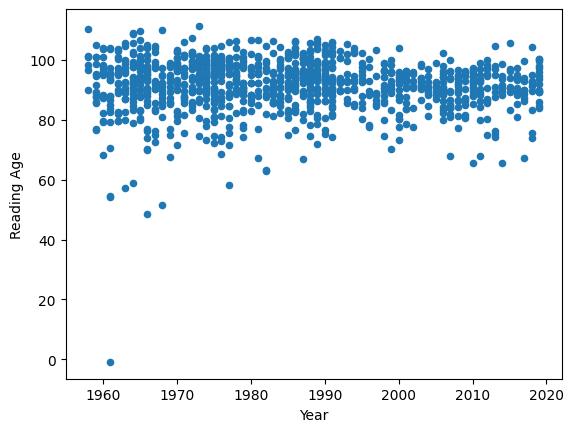

In [ ]:
#Graph the dataframe by year and reading age
df.plot.scatter(x="Year", y="Reading Age")

In [ ]:
df[df["Reading Age"].le(10)]

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count,Reading Age
57,The Lion Sleeps Tonight,The Tokens,1961,"\nWeeheeheehee, dee heeheeheehee, weeoh aweem ...",Weeheeheehee dee heeheeheehee weeoh aweem awa...,weeheeheehee dee heeheeheehee weeoh aweem awa...,"[weeheeheehee, dee, heeheeheehee, weeoh, aweem...","{'weeheeheehee': 9, 'dee': 9, 'heeheeheehee': ...",-0.861623


In [ ]:
df[df["Reading Age"].ge(100)]

,Song title,Artist,Year,Lyrics,Just Lyrics,Just Lower Lyrics,Lyrics List,Lyrics Count,Reading Age
0,Poor Little Fool,Ricky Nelson,1958,I used to play around with hearts\nThat hasten...,I used to play around with hearts That hastene...,i used to play around with hearts that hastene...,"[i, used, to, play, around, with, hearts, that...","{'i': 18, 'used': 1, 'to': 2, 'play': 2, 'arou...",100.877072
1,Little Star,The Elegants,1958,Where are you little star?\n(Where are you?)\n...,Where are you little star Where are you Whoa ...,where are you little star where are you whoa ...,"[where, are, you, little, star, where, are, yo...","{'where': 5, 'are': 8, 'you': 8, 'little': 5, ...",101.417771
5,To Know Him Is to Love Him,The Teddy Bears,1958,"\nTo know, know, know him\nIs to love, love, l...",To know know know him Is to love love love hi...,to know know know him is to love love love hi...,"[to, know, know, know, him, is, to, love, love...","{'to': 14, 'know': 13, 'him': 15, 'is': 5, 'lo...",110.384940
8,Venus,Frankie Avalon,1959,"\nHey, Venus!\nOh, Venus!\n\n\nVenus! If you w...",Hey Venus Oh Venus Venus If you will Please...,hey venus oh venus venus if you will please...,"[hey, venus, oh, venus, venus, if, you, will, ...","{'hey': 2, 'venus': 10, 'oh': 2, 'if': 3, 'you...",100.840761
17,Mr. Blue,The Fleetwoods,1959,\nOur guardian star lost all his glow the day ...,Our guardian star lost all his glow the day t...,our guardian star lost all his glow the day t...,"[our, guardian, star, lost, all, his, glow, th...","{'our': 1, 'guardian': 1, 'star': 1, 'lost': 3...",105.023787
...,...,...,...,...,...,...,...,...,...
1037,Take On Me,a-ha,1985,\nWe're talking away\nI don't know what I'm to...,Were talking away I dont know what Im to say ...,were talking away i dont know what im to say ...,"[were, talking, away, i, dont, know, what, im,...","{'were': 1, 'talking': 1, 'away': 5, 'i': 1, '...",101.025319
1038,The Way It Is,Bruce Hornsby & the Range,1986,"\n\n\nStanding in line, marking time\nWaiting ...",Standing in line marking time Waiting for t...,standing in line marking time waiting for t...,"[standing, in, line, marking, time, waiting, f...","{'standing': 1, 'in': 3, 'line': 2, 'marking':...",103.822008
1042,To Be With You,Mr. Big,1991,"\nHold on, little girl\nShow me what he's done...",Hold on little girl Show me what hes done to ...,hold on little girl show me what hes done to ...,"[hold, on, little, girl, show, me, what, hes, ...","{'hold': 2, 'on': 16, 'little': 3, 'girl': 2, ...",102.636469
1046,My Heart Will Go On,Celine Dion,1995,"\nEvery night in my dreams\nI see you, I feel ...",Every night in my dreams I see you I feel you...,every night in my dreams i see you i feel you...,"[every, night, in, my, dreams, i, see, you, i,...","{'every': 1, 'night': 1, 'in': 5, 'my': 9, 'dr...",102.240000


In [ ]:
#checking the reading age formula
row = df.iloc[0]
#print(row["Lyrics"])

print(reading_age_FK(row))
print(get_sentences(row))
print(get_sentences_alt(row))
print(get_words(row))
print(get_syllables(row))
print(row["Lyrics"])
print(row["Lyrics List"])
syllables = 0
words = row["Lyrics List"]
vowels = 'aeiouy'
for word in words:
    syllable_count = 0
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    syllables += syllable_count
    print(word, syllable_count)
print(syllables)

1078
100.23812004611617
24
27
257
293
I used to play around with hearts
That hastened at my call
But when I met that little girl
I knew that I would fall

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She played around and teased me
With her carefree devil eyes
She'd hold me close and kiss me
But her heart was full of lies

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

She told me how she cared for me
And that we'd never part
And so for the very first time
I gave away my heart

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)
You might also likeThe next day she was gone
And I knew she'd lied to me
She left me with a broken heart
And won her victory

Poor little fool, oh yeah
I was a fool, uh huh
(Oh oh, poor little fool)
(I was a fool, oh yeah)

Well, I'd played this game with other hearts
But I never thought I'd see
The day that someon

In [ ]:
206.35 - 1.015*(257/5) - 84.6*(293/257)

57.72841634241246

In [ ]:
import numpy as np
import pandas as pd
import pickle
with open('final_lyrics_dataframe.pickle', 'rb') as in_file:
    df = pickle.load(in_file)


df['decade'] = (df['Year'] // 10) * 10

by_decade = df.groupby(by='decade', group_keys=True).agg(
    Lyrics_List=pd.NamedAgg(column='Lyrics List', aggfunc='sum'),
    mean_reading_age=pd.NamedAgg(column='Reading Age', aggfunc='mean'),
)


by_decade = by_decade.reset_index()
by_decade

,decade,Lyrics_List,mean_reading_age
0,1950,"[i, used, to, play, around, with, hearts, that...",93.489914
1,1960,"[vocalizations, on, the, bank, of, the, river,...",90.043326
2,1970,"[raindrops, are, falling, on, my, head, and, j...",92.642321
3,1980,"[i, love, you, yeah, babe, i, love, you, so, i...",92.739402
4,1990,"[i, could, hardly, believe, it, when, i, heard...",92.404922
5,2000,"[what, a, girl, wants, what, a, girl, needs, w...",89.664492
6,2010,"[wake, up, in, the, morning, feelin, like, p, ...",90.426088


In [ ]:
by_year = df.groupby(by='Year', group_keys=True).agg(
    all_words=pd.NamedAgg(column='Lyrics List', aggfunc='sum'),
    mean_reading_age=pd.NamedAgg(column='Reading Age', aggfunc='mean'),
)
by_year = by_year.reset_index()
by_year.to_csv("by_year.csv")

In [ ]:
with open("1950.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[0]["all_words"]))
with open("1960.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[1]["all_words"]))
with open("1970.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[2]["all_words"]))
with open("1980.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[3]["all_words"]))
with open("1990.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[4]["all_words"]))
with open("2000.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[5]["all_words"]))
with open("2010.txt", "w")  as file:
    file.write(" ".join(by_decade.iloc[6]["all_words"]))


In [ ]:
#Make some visualisations
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
dec = 50
for row in by_decade["all_words"]:
  text = " ".join(x for x in row)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # plt.figure( figsize=(15,10))
  # plt.imshow(wordcloud, interpolation='bilinear')
  # plt.axis("off")
  # plt.show()
  with open(f"wordcloud{dec}.svg", "w") as file:
    file.write(wordcloud.to_svg())
  dec += 10

## Viewing the decades of word clouds:

### The 1960s
<img src="wordcloud60.svg" width="800px">

### The 1970s
<img src="wordcloud70.svg" width="800px">

### The 1980s
<img src="wordcloud80.svg" width="800px">

### The 1990s
<img src="wordcloud90.svg" width="800px">

### The 2000s
<img src="wordcloud00.svg" width="800px">

### The 2010s
<img src="wordcloud10.svg" width="800px">

## Nonsense Words

In [53]:
#get words from the internet and split into a set.
word_set = set()
with open("words.txt", "r") as file:
    credit = file.readline()
    for line in file:
        word_set.add(line.strip())

by_decade["Lyrics_Count"] = by_decade.apply(word_count, axis=1)

def nonsense_words(row):
    nonsense = set()
    pre_word = ""
    aft_word = ""
    for index, word in enumerate(row["Lyrics_List"]):
        if word not in word_set:
            if word == "baby3":
                pre_word = row["Lyrics_List"][index-1]
                aft_word = row["Lyrics_List"][index+1]
                print(pre_word, word, aft_word)
            nonsense.add(word)
    return nonsense

by_decade["nonsense"] =  by_decade.apply(nonsense_words, axis=1)
#send to csv
by_decade.to_csv("by_decade_nonsense.csv")


by_decade

my baby3 hit
angie baby3 picture
nobody baby3 with
you baby3 and


,decade,Lyrics_List,mean_reading_age,Lyrics_Count,nonsense
0,1950,"[i, used, to, play, around, with, hearts, that...",93.489914,"{'i': 161, 'used': 1, 'to': 81, 'play': 2, 'ar...","{sunday, aint, venus, dooley, hadnta, orleans,..."
1,1960,"[vocalizations, on, the, bank, of, the, river,...",90.043326,"{'vocalizations': 1, 'on': 407, 'the': 1247, '...","{baby3, jokin, guy1, tuesday, 5555, woodie, wa..."
2,1970,"[raindrops, are, falling, on, my, head, and, j...",92.642321,"{'raindrops': 5, 'are': 184, 'falling': 10, 'o...","{badder, npr, baby3, lalalalalala, bloodshot, ..."
3,1980,"[i, love, you, yeah, babe, i, love, you, so, i...",92.739402,"{'i': 2520, 'love': 797, 'you': 3349, 'yeah': ...","{martinique, dylan, chocolatecovered, 45, para..."
4,1990,"[i, could, hardly, believe, it, when, i, heard...",92.404922,"{'i': 2271, 'could': 68, 'hardly': 12, 'believ...","{baby3, grey38, 362436, downlow, ooh5, mariah,..."
5,2000,"[what, a, girl, wants, what, a, girl, needs, w...",89.664492,"{'what': 435, 'a': 1014, 'girl': 323, 'wants':...","{tuesday, shoulda, blaow, pickin, knicks, bust..."
6,2010,"[wake, up, in, the, morning, feelin, like, p, ...",90.426088,"{'wake': 10, 'up': 490, 'in': 618, 'the': 1541...","{wouh, dogg, wilin, ctd, tiptoein, freaka, sta..."
